# TP 2 - algoritmos de ensambles 

## Cargar librerias


In [1]:
import datetime
import IPython
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sweetviz as sv
import time
from matplotlib import pyplot
from numpy import mean
from numpy import std
from urllib.parse import urlparse

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.calibration import calibration_curve
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    roc_curve,
    make_scorer,
    accuracy_score,
    fbeta_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    KFold,
    GridSearchCV,
    RandomizedSearchCV,
    RepeatedStratifiedKFold,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import pickle
from sklearn.model_selection import LeaveOneGroupOut

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score

In [4]:
# # Observación: Descomentar en caso de que quieran versionar los modelos y la búsqueda de hiperparámetros.
# import mlflow
# import mlflow.sklearn
# from mlflow.tracking import MlflowClient

In [5]:
PARAM_RANDOM_STATE = 42

## Cargar dataset

In [6]:
df_original = pd.read_csv("01.df.procesado.csv")
# df_original = pd.read_csv("https://raw.githubusercontent.com/blukitas/AA-2021/main/TPs/02.TP/01.df.procesado.csv")
df_original.head()

,Unnamed: 0,file_path,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,start,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,0,./audios/ravdess/Actor_23/03-01-07-02-02-01-23...,3,1,7,2,2,1,23,0 days 00:00:00,...,0.075190,0.014015,0.022255,2.150538,1.089918,0.2825,0.126763,0.4900,0.397291,-36.658245
1,1,./audios/ravdess/Actor_23/03-02-03-02-02-01-23...,3,2,3,2,2,1,23,0 days 00:00:00,...,0.020998,0.009869,0.018871,1.492537,0.646552,0.8200,0.277248,0.5275,0.438770,-29.391884
2,2,./audios/ravdess/Actor_23/03-01-04-01-02-01-23...,3,1,4,1,2,1,23,0 days 00:00:00,...,0.047365,0.011048,0.011381,2.247191,0.569801,0.5900,0.160000,0.7600,0.296985,-43.332924
3,3,./audios/ravdess/Actor_23/03-02-04-02-02-01-23...,3,2,4,2,2,1,23,0 days 00:00:00,...,0.041743,0.012340,0.007390,1.394422,0.603622,0.9300,0.885701,0.5275,0.420260,-37.549572
4,4,./audios/ravdess/Actor_23/03-01-02-02-02-02-23...,3,1,2,2,2,2,23,0 days 00:00:00,...,0.053580,0.011590,0.005245,1.535088,0.886918,0.3875,0.206079,0.5740,0.424999,-43.261425


In [7]:
num_columns = [col for col in df_original.columns if df_original[col].dtype != "object"]
num_columns

['Unnamed: 0',
 'modality',
 'vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'actor',
 'F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1

In [8]:
drop_columns = [
    "file_path",
    "Unnamed: 0",
    "modality",
    "vocal_channel",
    #     "emotion",
    "emotional_intensity",
    "statement",
    "repetition",
    "actor",
]
num_columns = [x for x in num_columns if x not in drop_columns]
num_columns

['emotion',
 'F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNor

In [9]:
df_proc = df_original[num_columns]  # .head(10000)

## Split del dataset

**TBD** -> Cambiar el split para la métrica usando leave two. Con eso reacomodaríamos.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_proc.loc[:, df_proc.columns != "emotion"],
    df_proc["emotion"],
    stratify=df_proc["emotion"],
    random_state=PARAM_RANDOM_STATE,
)

In [11]:
labels_cm = ["Neu.", "Calm", "Hap.", "Sad", "Angry", "Fear.", "Disg.", "Surpr."]

## Groups

In [12]:
# groups = (X_train.actor // 2) + (X_train.actor % 2)
# logo = LeaveOneGroupOut()
# logo.get_n_splits(X_train, y_train, groups)

In [13]:
groups = (df_original.actor // 2) + (df_original.actor % 2)

In [14]:
# sorted(groups)
sorted(groups.unique())
groups.value_counts()

11    208
7     208
5     208
3     208
1     208
12    208
10    208
8     208
6     208
4     208
2     208
9     164
Name: actor, dtype: int64

<AxesSubplot:>

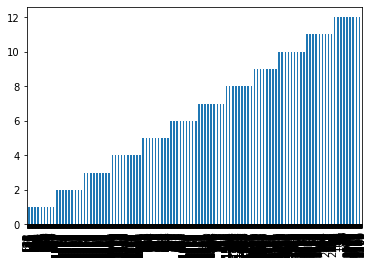

In [15]:
groups.sort_values().plot(kind="bar")

In [16]:
X_train = df_proc.loc[groups <= 10, df_proc.columns != "emotion"]
X_val = df_proc.loc[groups == 11, df_proc.columns != "emotion"]
X_train_val = df_proc.loc[groups <= 11, df_proc.columns != "emotion"]
X_test = df_proc.loc[groups == 12, df_proc.columns != "emotion"]

y_train = df_proc.loc[groups <= 10, "emotion"]
y_val = df_proc.loc[groups == 11, "emotion"]
y_train_val = df_proc.loc[groups <= 11, "emotion"]
y_test = df_proc.loc[groups == 12, "emotion"]

group_train = [x for x in groups if x <= 10]
group_val = [x for x in groups if x == 11]
group_train_val = [x for x in groups if x <= 11]
group_test = [x for x in groups if x == 12]

In [17]:
X_test

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,31.162280,0.103659,28.436132,31.203695,34.530006,6.093874,71.695320,42.723774,66.826570,39.508957,...,0.075190,0.014015,0.022255,2.150538,1.089918,0.282500,0.126763,0.490000,0.397291,-36.658245
1,32.832066,0.058510,31.873330,32.315525,34.425636,2.552307,74.677790,91.683740,26.730692,17.436796,...,0.020998,0.009869,0.018871,1.492537,0.646552,0.820000,0.277248,0.527500,0.438770,-29.391884
2,27.816698,0.067164,26.149890,27.284214,29.173655,3.023764,62.032460,63.740650,15.968684,9.053174,...,0.047365,0.011048,0.011381,2.247191,0.569801,0.590000,0.160000,0.760000,0.296985,-43.332924
3,32.421530,0.047639,31.190117,31.982471,34.491623,3.301506,40.428272,57.734535,13.244412,10.956038,...,0.041743,0.012340,0.007390,1.394422,0.603622,0.930000,0.885701,0.527500,0.420260,-37.549572
4,27.446953,0.111269,24.586010,26.893717,29.436794,4.850784,44.066093,39.952390,21.916230,7.514049,...,0.053580,0.011590,0.005245,1.535088,0.886918,0.387500,0.206079,0.574000,0.424999,-43.261425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,33.384823,0.129291,29.832968,34.702780,36.774480,6.941511,182.749420,97.858444,94.744020,83.644226,...,0.120215,0.007377,0.020331,1.970443,1.246883,0.304000,0.177831,0.474000,0.398979,-38.670864
2240,44.803856,0.036632,43.755340,44.315247,46.523070,2.767731,19.188236,3.504527,7.420811,6.073164,...,0.124252,0.006430,0.009222,1.829268,1.437372,0.334286,0.253932,0.338571,0.450315,-41.181730
2241,45.137970,0.160381,38.204502,43.318493,54.491745,16.287243,297.005070,482.484800,80.743450,36.427788,...,0.101797,0.006154,0.036091,2.020202,1.278773,0.284000,0.136029,0.396667,0.468496,-35.436405
2242,36.912320,0.074441,34.913330,36.732590,39.113068,4.199738,43.395910,41.328815,120.333530,145.930900,...,0.110965,0.011310,0.010739,2.313625,1.562500,0.243333,0.238723,0.321429,0.451519,-44.980280


## Desarrollo de modelos de ensamble

B) Elegir un modelo de ensamble visto durante las clases y entrenarlo para predecir emociones dividiendo el dataset de las siguientes maneras:
    i) 12-fold cross validation armando los folds de forma aleatoria.
    ii) Leave-2-speakers out. Es decir, 12 folds conteniendo cada uno 2 actores distintos. Se recomienda utilizar la función de sklearn LeaveOneGroupOut

Reportar los resultados obtenidos y realizar un análisis de los mismos, teniendo en cuenta las características del dataset utilizado.

### Métricas

f1. 

Si no está desbalanceado accuracy puede ser bien. 

F1 es un poco más robusta, pensando en que tiene en cuenta recall y precision.

<BarContainer object of 8 artists>

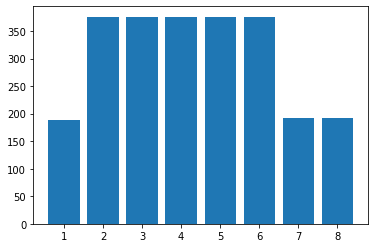

In [18]:
plt.bar(
    df_proc.groupby(["emotion"]).loudness_sma3_amean.count().index,
    df_proc.groupby(["emotion"]).loudness_sma3_amean.count(),
)

### Método elegido

Bagging con n árboles


### Árboles y búsqueda de hiperparámetros

Random search en 5000 árboles. Guardar esos 5000 en un pickle/csv para recuperarlo rápido. Quedarnos con el top 100.

#### Setup mlflow
Mlflow es una herramienta para versionado de modelos. Permite registrar paramétros, métricas y guardar los modelos entrenados asociados a una iteración.

En caso de no ser necesario comentar estas lineas.

In [19]:
# # now = datetime.datetime.now()
# mlflow.set_tracking_uri("http://mlflow_server:5000")
# tracking_uri = mlflow.get_tracking_uri()
# print("Current tracking uri: {}".format(tracking_uri))

In [20]:
# # No hace falta el create, el set lo crea si no existe
# experiment = mlflow.set_experiment(
#     "AA.TP2.RandomizedSearchCV.{0}".format(now.strftime("%Y-%m-%d"))
# )

### Bagging propiamente dicho

Combinan strong learners, los cuales tienen varianza alta, para reducir su varianza. El bagging consiste en utilizar distintos subsets de los datos de entrenamiento para entrenar cada learner. Los subsets se generan tomando muestras con reemplazo. Si no se hace reemplazo se denomina **pasting**, y si en lugar de tomar subsets sobre los datos, los tomamos sobre los atributos, se denomina **random subspaces**. La combinación de bagging y random subspaces se denomina **random patches**.

https://www.pluralsight.com/guides/ensemble-methods:-bagging-versus-boosting

Scikit Learn cuenta un tipo de objetos llamados meta-estimadores para representar a los ensambles. Este nombre se debe a que estos meta-estimadores necesitan definir estimadores base que van a ser justamente los modelos que se ajusten en cada uno de los pasos de bootstrapping. Como modelos/estimadores base podemos instanciar cualquier estimador de sklearn. Para el caso de Bagging, el meta-estimador para clasificación es:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Este objeto tiene como principal parámetro a base_estimator en el cual instanciaremos un modelo. Veamos un pequeño ejemplo:

**tbd** Acomodarlo a los árboles que usamos

In [21]:
# Version 0 del árbol

# kfold = KFold(n_splits = 12,
#                        random_state = PARAM_RANDOM_STATE, shuffle=True)

# # initialize the base classifier
# # TBD: Inicializar con el mejor árbol
# #      ¿Se puede inicializar con n arboles?
# # TBD: Hacer un par y compararlos? Tiene sentido?
# base_cls = DecisionTreeClassifier()

# # no. of base classifier
# num_trees = 1000

# # bagging classifier
# model = BaggingClassifier(base_estimator = base_cls,
#                           n_estimators = num_trees,
#                           random_state = PARAM_RANDOM_STATE)

# # max_samples en float nos dice que porcentaje del training set queremos remuestrear
# # max_features nos da un grado mas de aleatorizacion, muestreo en las columnas/features del conjunto de datos
# results = cross_val_score(model, X_train, y_train, cv = kfold)

# # fit
# model.fit(X_train, y_train)

In [22]:
start = time.time()

kfold = StratifiedKFold(n_splits=12, random_state=PARAM_RANDOM_STATE, shuffle=True)
# seteamos una metrica apropiada al problema multiclase
scorer_fn = make_scorer(
    f1_score, average="weighted"
)  

base_cls = DecisionTreeClassifier(class_weight="balanced")

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(
    base_estimator=base_cls,
    n_estimators=num_trees,
    random_state=PARAM_RANDOM_STATE,
    # shuffle=True,
    n_jobs=10,
    verbose=True,
)

results_f1 = cross_val_score(
    estimator=model, X=X_train, y=y_train, cv=kfold, n_jobs=10, scoring=scorer_fn
)
model.fit(X_train, y_train)

end = time.time()
print(f"Tiempo: { round(end - start, 2) } segundos")

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   11.0s remaining:   44.2s


Tiempo: 137.49 segundos


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   12.2s finished


In [23]:
# Ref: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# pickle.dump(model, open('03.02.Bagging_stratified_balanced.pkl', 'wb'))

In [24]:
# En caso de estar reejecutando => load model
# loaded_model = pickle.load(open('03.02.Bagging_balanced.pkl', 'rb'))
loaded_model = pickle.load(open("03.02.Bagging_stratified_balanced.pkl", "rb"))

In [25]:
y_pred_test = loaded_model.predict(X_test)
y_pred_train = loaded_model.predict(X_train)
# evaluación
print("Accuracy training : {:.3f}".format(loaded_model.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(loaded_model.score(X_test, y_test)))

print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("Test recall: {}".format(recall_score(y_test, y_pred_test, average="weighted")))
print(
    "Test F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1, average="weighted"))
)
print(
    "Test F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2, average="weighted"))
)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy training : 1.000


[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.2s remaining:    0.7s


Accuracy test: 0.567
Train acc: 1.0
Test acc: 0.5673076923076923
Test recall: 0.5673076923076923
Test F1: 0.5705818371177761
Test F2: 0.5637935741211533


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.6s finished


In [26]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.32      0.62      0.43        16
           2       0.73      0.69      0.71        32
           3       0.48      0.34      0.40        32
           4       0.50      0.56      0.53        32
           5       0.80      0.62      0.70        32
           6       0.73      0.59      0.66        32
           7       0.71      0.31      0.43        16
           8       0.43      0.81      0.57        16

    accuracy                           0.57       208
   macro avg       0.59      0.57      0.55       208
weighted avg       0.61      0.57      0.57       208



En esta implementación del *BaggingClassifier* no es necesario usar estimadores base que sean *strong learners*, podemos usar cualquier tipo de estimador. Sin embargo, para que bagging performe mejor que el modelo base, si es necesaria esta condición. 

### 12-fold cross validation

In [27]:
# scores = cross_val_score(estimator=loaded_model, X=X_train, y=y_train, cv=12, n_jobs=4)

In [28]:
all_metrics = []
metric_labels = []

In [29]:
k_folds_accs = []
k_folds_precisions = []
k_folds_recalls = []
k_folds_f1 = []
k_folds_f2 = []

In [30]:
start = time.time()

k_folds_accs = cross_val_score(
    estimator=loaded_model, X=X_train, y=y_train, cv=12, n_jobs=4
)
scorer_precision = make_scorer(precision_score, average="weighted")
k_folds_precisions = cross_val_score(
    estimator=loaded_model,
    X=X_train,
    y=y_train,
    cv=12,
    n_jobs=4,
    scoring=scorer_precision,
)
scorer_recall = make_scorer(recall_score, average="weighted")
k_folds_recalls = cross_val_score(
    estimator=loaded_model, X=X_train, y=y_train, cv=12, n_jobs=4, scoring=scorer_recall
)
scorer_f1 = make_scorer(fbeta_score, beta=1, average="weighted")
k_folds_f1 = cross_val_score(
    estimator=loaded_model, X=X_train, y=y_train, cv=12, n_jobs=4, scoring=scorer_f1
)
# Scorer que vamos a usar durante el notebook
scorer_f2 = make_scorer(fbeta_score, beta=2, average="weighted")
k_folds_f2.append(
    cross_val_score(
        estimator=loaded_model, X=X_train, y=y_train, cv=12, n_jobs=4, scoring=scorer_f2
    )
)

end = time.time()
print(f"Tiempo: { round(end - start, 2) } segundos")

Tiempo: 1239.39 segundos


In [31]:
all_metrics = (
    all_metrics
    + list(k_folds_accs)
    + list(k_folds_precisions)
    + list(k_folds_recalls)
    + list(k_folds_f1)
    + list(k_folds_f2[0])
)
metric_labels = (
    metric_labels
    + ["Accuracy"] * len(k_folds_accs)
    + ["Precision"] * len(k_folds_precisions)
    + ["Recall"] * len(k_folds_recalls)
    + ["F1 Score"] * len(k_folds_f1)
    + ["F2 Score"] * len(k_folds_f2[0])
)

In [32]:
len(all_metrics)

60

In [33]:
all_metrics

[0.5941176470588235,
 0.5058823529411764,
 0.49411764705882355,
 0.6941176470588235,
 0.5882352941176471,
 0.5529411764705883,
 0.5882352941176471,
 0.6058823529411764,
 0.48520710059171596,
 0.5680473372781065,
 0.5088757396449705,
 0.5207100591715976,
 0.6176583053438729,
 0.5613191434931744,
 0.5517448680351906,
 0.7083645315711423,
 0.6337701697279703,
 0.5804008684813639,
 0.6249807169244509,
 0.648516143299425,
 0.5474974301061257,
 0.5833118298705343,
 0.5160148644894547,
 0.5145869408813788,
 0.5941176470588235,
 0.5058823529411764,
 0.49411764705882355,
 0.6941176470588235,
 0.5882352941176471,
 0.5529411764705883,
 0.5882352941176471,
 0.6058823529411764,
 0.48520710059171596,
 0.5680473372781065,
 0.5088757396449705,
 0.5207100591715976,
 0.5853256134989882,
 0.49838719502868417,
 0.4920223056855728,
 0.6902240771439846,
 0.5735838375114856,
 0.5495896248734704,
 0.5824679845014062,
 0.5890551780665825,
 0.4804748772712159,
 0.564015743455187,
 0.4974573512753374,
 0.5046324

### Leave-2-speakers out.

In [34]:
sorted(df_original.actor.unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [35]:
groups = (df_original.actor // 2) + (df_original.actor % 2)

In [36]:
# sorted(groups)
sorted(groups.unique())
groups.value_counts()

11    208
7     208
5     208
3     208
1     208
12    208
10    208
8     208
6     208
4     208
2     208
9     164
Name: actor, dtype: int64

<AxesSubplot:>

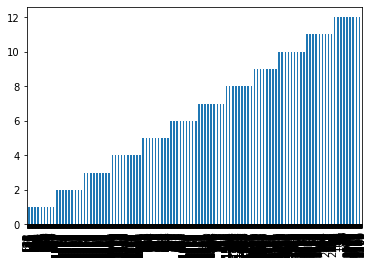

In [37]:
groups.sort_values().plot(kind="bar")

In [38]:
print(f"count: {len(X_train)}")
print(f"count: {len(y_train)}")
print(f"count: {len(groups)}")

count: 2036
count: 2036
count: 2452


In [39]:
print(f"count: {X_train.shape}")
print(f"count: {y_train.shape}")
print(f"count: {groups.shape}")

count: (2036, 88)
count: (2036,)
count: (2452,)


In [40]:
X_train

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
104,32.667942,0.065519,31.263319,32.097430,35.721237,4.457918,14.956980,5.565262,10.083265,5.565086,...,0.098178,0.015592,0.005733,1.822324,0.460830,1.120000,0.520000,0.683333,0.450506,-37.140460
105,32.622143,0.049787,31.440880,32.059650,34.900654,3.459774,21.115547,16.798904,11.710975,6.603377,...,0.068033,0.011409,0.009596,2.036199,0.457666,1.160000,0.520000,0.666667,0.422085,-34.182198
106,23.421627,0.071589,22.393826,23.624762,24.891598,2.497772,150.534040,203.807540,35.221855,31.733028,...,0.052928,0.010891,0.007966,2.023121,0.879765,0.416667,0.141970,0.522500,0.458605,-46.895203
107,24.396180,0.087991,22.433584,24.256900,26.340778,3.907194,252.458370,358.249000,31.001072,12.709707,...,0.074990,0.012042,0.011143,2.380952,1.510574,0.194000,0.124836,0.444000,0.454911,-48.063854
108,27.157800,0.190745,25.587510,26.391394,27.204054,1.616545,211.116470,205.744930,155.215330,145.674260,...,0.043434,0.008983,0.015381,2.439024,1.098901,0.332500,0.341788,0.444000,0.442746,-42.572178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,44.560787,0.063941,43.413990,44.316803,46.398100,2.984112,129.616990,195.710800,21.788360,15.365043,...,0.141634,0.016549,0.012033,2.173913,0.914077,0.638000,0.376478,0.361667,0.443148,-37.267227
2344,30.963875,0.173062,23.106842,33.840866,34.122574,11.015732,23.248434,0.000000,118.830840,0.000000,...,0.117290,0.010528,0.007361,2.292263,0.872093,0.040000,0.000000,0.644000,0.469238,-63.180332
2345,44.649708,0.038449,43.541440,44.083908,45.436850,1.895412,87.684890,124.352330,15.508397,6.425661,...,0.130399,0.018723,0.015202,2.057613,0.831601,0.640000,0.163095,0.713333,0.419868,-33.109707
2346,32.257084,0.123510,31.786459,33.777252,34.393433,2.606974,157.340850,154.486600,123.891420,57.611485,...,0.109062,0.012997,0.009449,3.179191,1.173021,0.102500,0.059319,0.574000,0.517401,-59.825146


In [41]:
groups_accs = []
groups_precisions = []
groups_recalls = []
groups_f1 = []
groups_f2 = []

In [42]:
start = time.time()

# X = df_proc.loc[:, df_proc.columns != "emotion"]
# y = df_proc["emotion"]
logo = LeaveOneGroupOut()
logo.get_n_splits(X_train, y_train, groups)
for train_index, test_index in logo.split(X_train, y_train, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    print("x_train")
    group_X_train, group_X_test = X_train.iloc[train_index], X_train.iloc[test_index]
    print("y_train")
    group_y_train, group_y_test = y_train.iloc[train_index], y_train.iloc[test_index]
    # print(group_X_train, group_X_test, group_y_train, group_y_test)

    # Train - Fit - Metrics (A array => boxplot)
    loaded_model.fit(group_X_train, group_y_train)
    group_y_pred_test = loaded_model.predict(group_X_test)
    group_y_pred_train = loaded_model.predict(group_X_train)
    # evaluación
    print(
        "Accuracy training : {:.3f}".format(
            loaded_model.score(group_X_train, group_y_train)
        )
    )
    print(
        "Accuracy test: {:.3f}".format(loaded_model.score(group_X_test, group_y_test))
    )

    print("Train acc: {}".format(accuracy_score(group_y_train, group_y_pred_train)))
    print("Test acc: {}".format(accuracy_score(group_y_test, group_y_pred_test)))
    print(
        "Test recall: {}".format(
            recall_score(group_y_test, group_y_pred_test, average="weighted")
        )
    )
    print(
        "Test F1: {}".format(
            fbeta_score(group_y_test, group_y_pred_test, beta=1, average="weighted")
        )
    )
    print(
        "Test F2: {}".format(
            fbeta_score(group_y_test, group_y_pred_test, beta=2, average="weighted")
        )
    )

    groups_accs.append(accuracy_score(group_y_test, group_y_pred_test))
    groups_precisions.append(
        precision_score(group_y_test, group_y_pred_test, average="weighted")
    )
    groups_recalls.append(
        recall_score(group_y_test, group_y_pred_test, average="weighted")
    )
    groups_f1.append(
        fbeta_score(group_y_test, group_y_pred_test, beta=1, average="weighted")
    )
    groups_f2.append(
        fbeta_score(group_y_test, group_y_pred_test, beta=2, average="weighted")
    )

end = time.time()
print(f"Tiempo: { round(end - start, 2) } segundos")

ValueError: Found input variables with inconsistent numbers of samples: [2036, 2036, 2452]

In [ ]:
all_metrics = (
    all_metrics
    + list(groups_accs)
    + list(groups_precisions)
    + list(groups_recalls)
    + list(groups_f1)
    + list(groups_f2)
)
metric_labels = (
    metric_labels
    + ["Accuracy"] * len(groups_accs)
    + ["Precision"] * len(groups_precisions)
    + ["Recall"] * len(groups_recalls)
    + ["F1 Score"] * len(groups_f1)
    + ["F2 Score"] * len(groups_f2)
)

In [ ]:
len(all_metrics)  # Porque 65?

In [ ]:
all_metrics

In [ ]:
hue = ["Kfold"] * 60 + ["Leave-2-speakers"] * 60
fig = plt.figure(figsize=(15, 8))
sns.boxplot(metric_labels, all_metrics, hue=hue)

fig.savefig("04.01.Bagging_balanced.png")

## Comparación de modelos

C) Realizar la división de datos de la manera que considere más adecuada, teniendo en cuenta el análisis realizado en b), y comparar el desempeño de Random Forests y AdaBoost. Realizar una búsqueda de hiperparámetros para ambos modelos. Para esto, deberá elegirse una métrica de evaluación y justificar la elección. Reportar y analizar la matriz de confusión del mejor modelo, tanto para el caso de audios cantados como hablados.

1. Train/Test
2. Métrica
3. Busqueda hiperparámetros (Cuáles son los hiperparametros? Cual el espacio de búsqueda acotado?)
    * Random forest
    * Adaboost
4. Comparación de modelos
    * Matriz de confusión
5. Comprar ambos modelos
    * Cantados
    * Hablados

### Métrica

f1? o accuracy?

### Random Forests

Random Forest es una implementación de un algoritmo de *Bagging* que propone como estimadores base a **n_estimators** árboles de decisión. Cada árbol verá un subset distinto de los datos de entrenamiento (bagging, llamado **bootstrap** en los parámetros de sklearn). A su vez, para elegir el mejor split en cada nivel, se tienen en cuenta solo **max_features** atributos, seleccionados al azar. Estas 2 técnicas combinadas llevan a obtener árboles que sean distintos entre si y estén decorrelacionados, lo cual es bueno ya que si un árbol comete errores, probablemente otros no lo cometerán y se compensarán. Cuanto más independientes sean los árboles entre si más reduciremos la varianza.

random forest pelado

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=PARAM_RANDOM_STATE)
rf.fit(X_train, y_train)
print("Accuracy training : {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy training : 1.000
Accuracy test: 0.611


In [44]:
random_model = pickle.load(open("03.04.Random_forest.pkl", "rb"))

clf.best_score_
0.5136253725424362
clf.best_params_
{'n_estimators': 410}

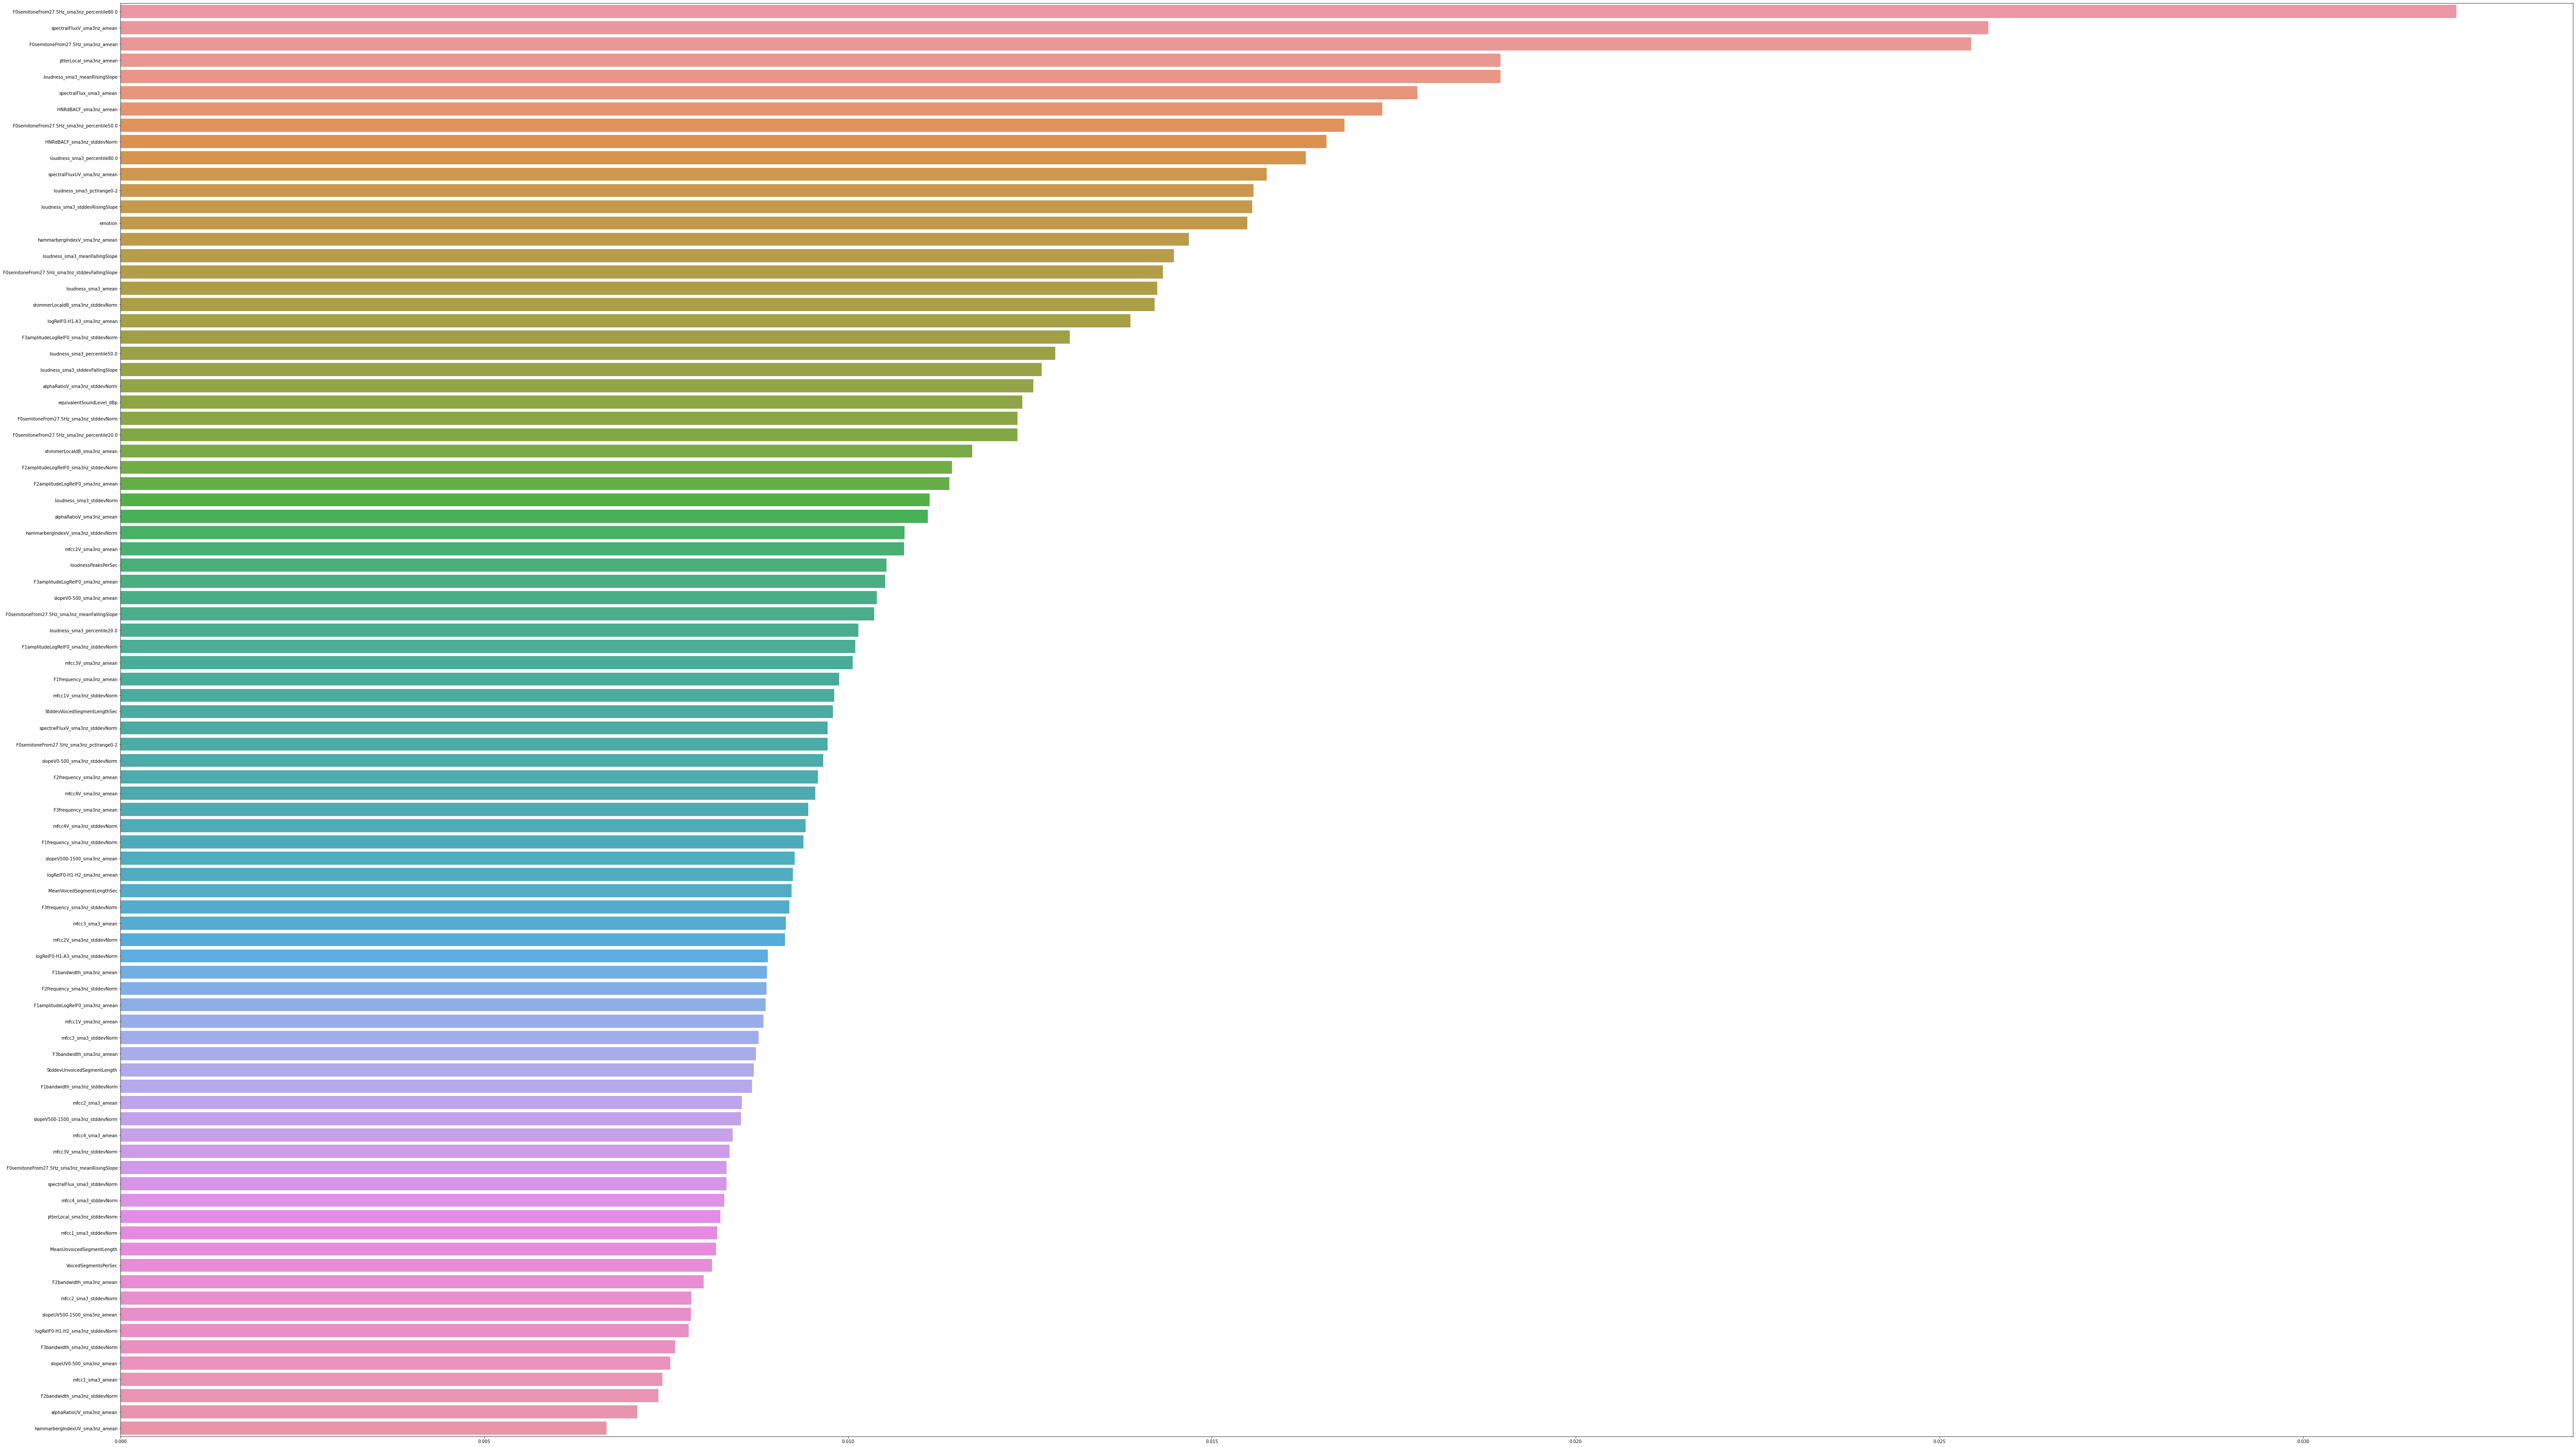

In [45]:
features = [x for i, x in enumerate(df_proc.columns) if i != 8]
feat_importances = random_model.feature_importances_

plt.figure(figsize=(100, 60))
graph_importance = sns.barplot(
    y=features,
    x=feat_importances,
    orient="h",
    order=reversed(np.array(features)[np.argsort(feat_importances)]),
)


graph_importance.figure.savefig(
    "04.03.Random_forest.feature_importante.png", bbox_inches="tight"
)

In [46]:
# df_proc.loc[:, df_proc.columns != "emotion"],
#     df_proc["emotion"],

importancia_predictores = pd.DataFrame(
    {
        "Predictor": df_proc.loc[:, df_proc.columns != "emotion"],
        "Importancia": random_model.feature_importances_,
    }
)
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values("Importancia", ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,Predictor,Importancia
5,"(F, 0, s, e, m, i, t, o, n, e, F, r, o, m, 2, ...",0.032106
66,"(s, p, e, c, t, r, a, l, F, l, u, x, V, _, s, ...",0.025672
1,"(F, 0, s, e, m, i, t, o, n, e, F, r, o, m, 2, ...",0.025441
30,"(j, i, t, t, e, r, L, o, c, a, l, _, s, m, a, ...",0.018968
16,"(l, o, u, d, n, e, s, s, _, s, m, a, 3, _, m, ...",0.018967
...,...,...
78,"(s, l, o, p, e, U, V, 0, -, 5, 0, 0, _, s, m, ...",0.007555
22,"(m, f, c, c, 1, _, s, m, a, 3, _, a, m, e, a, n)",0.007447
49,"(F, 2, b, a, n, d, w, i, d, t, h, _, s, m, a, ...",0.007392
76,"(a, l, p, h, a, R, a, t, i, o, U, V, _, s, m, ...",0.007099


In [47]:
y_pred_test = random_model.predict(X_test)
y_pred_train = random_model.predict(X_train)
# evaluación
print("Accuracy training : {:.3f}".format(random_model.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(random_model.score(X_test, y_test)))
print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("Test recall: {}".format(recall_score(y_test, y_pred_test, average="weighted")))
print(
    "Test F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1, average="weighted"))
)
print(
    "Test F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2, average="weighted"))
)

Accuracy training : 1.000
Accuracy test: 0.596
Train acc: 1.0
Test acc: 0.5961538461538461
Test recall: 0.5961538461538461
Test F1: 0.5963982386490976
Test F2: 0.5925251282471268


In [48]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.41      0.56      0.47        16
           2       0.70      0.72      0.71        32
           3       0.39      0.34      0.37        32
           4       0.54      0.59      0.57        32
           5       0.95      0.62      0.75        32
           6       0.70      0.66      0.68        32
           7       0.67      0.38      0.48        16
           8       0.50      0.94      0.65        16

    accuracy                           0.60       208
   macro avg       0.61      0.60      0.58       208
weighted avg       0.63      0.60      0.60       208



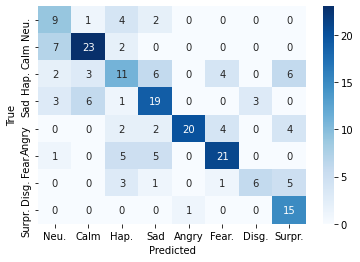

In [49]:
ax = plt.subplot()
cm = confusion_matrix(y_test, y_pred_test)
matriz_n_aria = sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
ax.xaxis.set_ticklabels(labels_cm)
ax.yaxis.set_ticklabels(labels_cm)

matriz_n_aria.figure.savefig("04.04.Random_forest.matriz.png", bbox_inches="tight")

### AdaBoost
En cada iteración construye un stump nuevo y le da más peso a las muestras que fueron clasificadas mal por el anterior stump. De esta manera, en cada iteración se intenta corregir los errores que cometió el anterior clasificador. Una vez armado el ensamble, cada stump tendrá asociado un peso en sus predicciones de acuerdo a qué tan bueno fue clasificando durante el entrenamiento. A continuación les dejamos un video explicativo del funcionamiento del algoritmo:

https://www.youtube.com/watch?v=LsK-xG1cLYA&ab_channel=StatQuestwithJoshStarmerStatQuestwithJoshStarmerVerified

La implementación de AdaBoost de sklearn nos provee de un meta-estimador para Boosting, al cual le podemos pasar cualquier estimador (por defecto usa un arbol de profundidad 1, un stump):

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboost#sklearn.ensemble.AdaBoostClassifier

Paper original:
https://web.stanford.edu/~hastie/Papers/samme.pdf 


In [50]:
adaboost_model = pickle.load(open("03.05.AdaBoost.pkl", "rb"))

clf.best_score_
0.38099717517653114

clf.best_params_
{'n_estimators': 285, 'learning_rate': 1.3009999999999997}

In [51]:
# matriz de confusión y classification_report
y_pred_test = adaboost_model.predict(X_test)
y_pred_train = adaboost_model.predict(X_train)

# evaluación
print("Accuracy training : {:.3f}".format(adaboost_model.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(adaboost_model.score(X_test, y_test)))
print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("Test recall: {}".format(recall_score(y_test, y_pred_test, average="weighted")))
print(
    "Test F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1, average="weighted"))
)
print(
    "Test F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2, average="weighted"))
)

Accuracy training : 0.778
Accuracy test: 0.394
Train acc: 0.7784872298624754
Test acc: 0.3942307692307692
Test recall: 0.3942307692307692
Test F1: 0.3936150821276679
Test F2: 0.38994364819744176


In [52]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.35      0.56      0.43        16
           2       0.60      0.47      0.53        32
           3       0.26      0.34      0.30        32
           4       0.24      0.31      0.27        32
           5       0.61      0.34      0.44        32
           6       0.45      0.31      0.37        32
           7       0.43      0.19      0.26        16
           8       0.50      0.81      0.62        16

    accuracy                           0.39       208
   macro avg       0.43      0.42      0.40       208
weighted avg       0.43      0.39      0.39       208



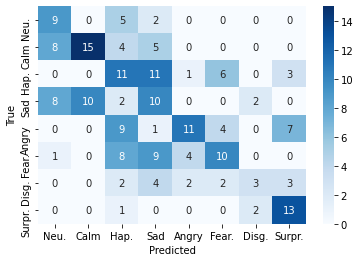

In [53]:
ax = plt.subplot()
cm = confusion_matrix(y_test, y_pred_test)
matriz_n_aria = sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
ax.xaxis.set_ticklabels(labels_cm)
ax.yaxis.set_ticklabels(labels_cm)


matriz_n_aria.figure.savefig("04.05.Adaboost.matriz.png", bbox_inches="tight")

### Matriz de confusión

Mejor modelo: Random forest

Comparación cantados vs speech

#### Representatividad de cada categoría


<AxesSubplot:xlabel='emotion'>

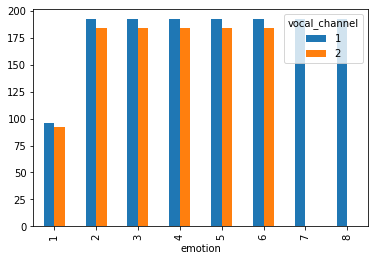

In [54]:
pd.crosstab(df_original["emotion"], df_original["vocal_channel"]).plot.bar()

In [55]:
df_original.loc[groups == 12, "vocal_channel"].value_counts()
# 1 - speech
# 2 - son

1    120
2     88
Name: vocal_channel, dtype: int64

In [56]:
y_speech_pred_test = random_model.predict(X_test)

In [57]:
# df_original.loc[groups == 12]
y_test[df_original.loc[groups == 12, "vocal_channel"] == 1]

0       7
2       4
4       2
7       7
11      2
       ..
2238    6
2239    7
2241    8
2242    3
2243    5
Name: emotion, Length: 120, dtype: int64

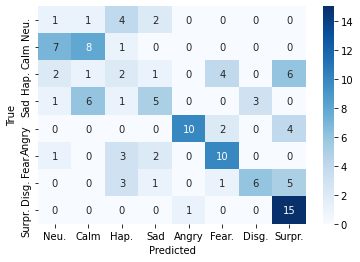

In [58]:
ax = plt.subplot()
cm = confusion_matrix(
    y_test[df_original.loc[groups == 12, "vocal_channel"] == 1],
    y_speech_pred_test[df_original.loc[groups == 12, "vocal_channel"] == 1],
)
heat_speech = sns.heatmap(
    cm,
    cmap="Blues",
    annot=True,
    fmt="g",
)
plt.xlabel("Predicted")
plt.ylabel("True")
ax.xaxis.set_ticklabels(labels_cm)
ax.yaxis.set_ticklabels(labels_cm)

heat_speech.figure.savefig("04.06.Matriz.speech.png", bbox_inches="tight")

In [59]:
print(
    "Accuracy test: {:.3f}".format(
        random_model.score(
            X_test[df_original.loc[groups == 12, "vocal_channel"] == 1],
            y_test[df_original.loc[groups == 12, "vocal_channel"] == 1],
        )
    )
)
print(
    "Test F1: {}".format(
        fbeta_score(
            y_test[df_original.loc[groups == 12, "vocal_channel"] == 1],
            y_speech_pred_test[df_original.loc[groups == 12, "vocal_channel"] == 1],
            beta=1,
            average="weighted",
        )
    )
)

Accuracy test: 0.475
Test F1: 0.4710238618064705


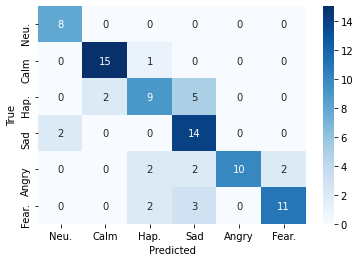

In [60]:
ax = plt.subplot()
cm = confusion_matrix(
    y_test[df_original.loc[groups == 12, "vocal_channel"] == 2],
    y_speech_pred_test[df_original.loc[groups == 12, "vocal_channel"] == 2],
)
heat_song = sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
ax.xaxis.set_ticklabels(labels_cm[:-2])
ax.yaxis.set_ticklabels(labels_cm[:-2])

heat_song.figure.savefig("04.06.Matriz.song.png", bbox_inches="tight")

In [61]:
print(
    "Accuracy test: {:.3f}".format(
        random_model.score(
            X_test[df_original.loc[groups == 12, "vocal_channel"] == 2],
            y_test[df_original.loc[groups == 12, "vocal_channel"] == 2],
        )
    )
)
print(
    "Test F1: {}".format(
        fbeta_score(
            y_test[df_original.loc[groups == 12, "vocal_channel"] == 2],
            y_speech_pred_test[df_original.loc[groups == 12, "vocal_channel"] == 2],
            beta=1,
            average="weighted",
        )
    )
)

Accuracy test: 0.761
Test F1: 0.7602521477129628
